# COVID-19 Análisis 
### Un enfoque Visual de análisis de datos exploratorio enfocado en Venezuela.
#### Extra: El caso Suecia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x) #opción para evitar la notacion cientifica



## Fuente de la data

Toda la data se obtuvo de la pagina de la [WHO](https://covid19.who.int/WHO-COVID-19-global-data.csv) 

In [2]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path = os.path.join("data", "covid")
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path, "WHO-COVID-19-global-data.csv")
urllib.request.urlretrieve(url, csv_path)
df = pd.read_csv(csv_path)
df.columns = [col.strip() for col in df.columns]
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
33816,2020-08-05,ZW,Zimbabwe,AFRO,146,4221,1,81
33817,2020-08-06,ZW,Zimbabwe,AFRO,118,4339,3,84
33818,2020-08-07,ZW,Zimbabwe,AFRO,56,4395,13,97
33819,2020-08-08,ZW,Zimbabwe,AFRO,56,4451,5,102


## Selección de Países
(Colombia, Argentina, Peru, Ecuador, Chile, Uruguay, Venezuela, Brasil)


In [3]:
df_col = df[df.Country == "Colombia"][["Date_reported", "New_cases"]]
#df_col.index = df_col.Date_reported
#df_col.columns = ["Date_reported_col", "New_cases_col"]
df_arg = df[df.Country == "Argentina"][["Date_reported", "New_cases"]]
#df_arg.index = df_arg.Date_reported
#df_arg.columns = ["Date_reported_col", "New_cases_col"]
df_per = df[df.Country == "Peru"][["Date_reported", "New_cases"]]
#df_per.index = df_per.Date_reported
#df_per.columns = ["Date_reported_col", "New_cases_col"]
df_ecu = df[df.Country == "Ecuador"][["Date_reported", "New_cases"]]
#df_ecu.index = df_ecu.Date_reported
#df_ecu.columns = ["Date_reported_col", "New_cases_col"]
df_chi = df[df.Country == "Chile"][["Date_reported", "New_cases"]]
#df_chi.index = df_chi.Date_reported
#df_chi.columns = ["Date_reported_col", "New_cases_col"]
df_rwa = df[df.Country == "Rwanda"][["Date_reported", "New_cases"]]
#df_rwa.index = df_rwa.Date_reported
#df_rwa.columns = ["Date_reported_rwa", "New_cases_rwa"]
df_ven = df[df.Country_code == "VE"][["Date_reported", "New_cases"]]
#df_ven.index = df_ven.Date_reported
#df_ven.columns = ["Date_reported_ven", "New_cases_ven"]
df_bra = df[df.Country == "Brazil"][["Date_reported", "New_cases"]]
df_usa = df[df.Country_code == "US"][["Date_reported", "New_cases"]]
df_uru = df[df.Country == "Uruguay"][["Date_reported", "New_cases"]]
df_sue = df[df.Country == "Sweden"][["Date_reported", "New_cases", "New_deaths"]]
df_den = df[df.Country == "Denmark"][["Date_reported", "New_cases", "New_deaths"]]
df_nor = df[df.Country == "Norway"][["Date_reported", "New_cases", "New_deaths"]]


In [4]:
df_ven.columns = ["Date_reported", "New_cases_ven"]
df_ven = pd.merge(df_ven, df_col, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col"]
df_ven = pd.merge(df_ven, df_chi, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi"]
df_ven = pd.merge(df_ven, df_ecu, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven","New_cases_col", "New_cases_chi","New_cases_ecu"]
df_ven = pd.merge(df_ven, df_per, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per"]
df_ven = pd.merge(df_ven, df_arg, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg"]
df_ven = pd.merge(df_ven, df_bra, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra"]
df_ven = pd.merge(df_ven, df_usa, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra", "New_cases_usa"]
df_ven = pd.merge(df_ven, df_rwa, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra", "New_cases_usa", "New_cases_rwa"]

df_ven = pd.merge(df_ven, df_uru, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra", "New_cases_usa", "New_cases_rwa", "New_cases_uru"]

df_ven = pd.merge(df_ven, df_sue, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra", "New_cases_usa", "New_cases_rwa", "New_cases_uru", "New_cases_sue", "New_deaths_sue"]



In [5]:
df_ven["New_cases_roll_ven"] = df_ven.New_cases_ven.rolling(7).mean()
df_ven["New_cases_roll_col"] = df_ven.New_cases_col.rolling(7).mean()
df_ven["New_cases_roll_chi"] = df_ven.New_cases_chi.rolling(7).mean()
df_ven["New_cases_roll_ecu"] = df_ven.New_cases_ecu.rolling(7).mean()
df_ven["New_cases_roll_per"] = df_ven.New_cases_per.rolling(7).mean()
df_ven["New_cases_roll_arg"] = df_ven.New_cases_arg.rolling(7).mean()
df_ven["New_cases_roll_bra"] = df_ven.New_cases_bra.rolling(7).mean()
df_ven["New_cases_roll_usa"] = df_ven.New_cases_usa.rolling(7).mean()
df_ven["New_cases_roll_rwa"] = df_ven.New_cases_rwa.rolling(7).mean()
df_ven["New_cases_roll_uru"] = df_ven.New_cases_uru.rolling(7).mean()
df_ven["New_cases_roll_sue"] = df_ven.New_cases_sue.rolling(7).mean()

df_ven = df_ven[~np.isnan(df_ven.New_cases_roll_ven)]

## El Contexto en Sur América
Chile ha logrado aplanar la curva, Perú enfrente una segunda ola, en Ecuador después del repunte de Abril han mantenido su tasa de casos estable por último Argentina y Colombia siguen en la fase ascendente de la curva.


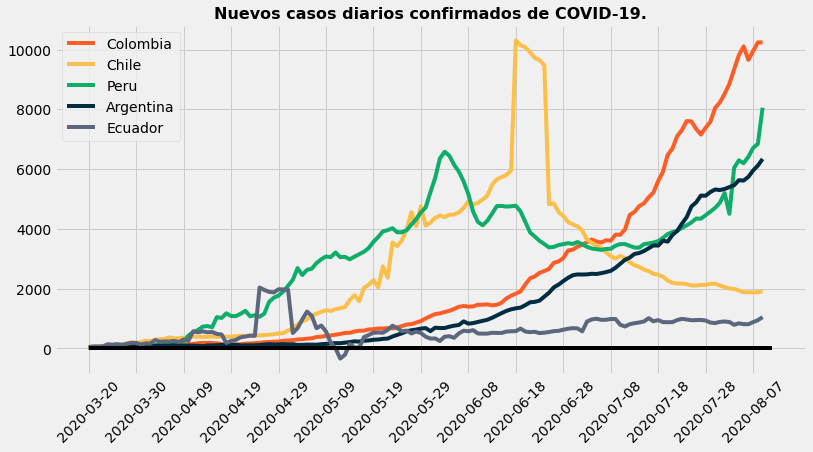

In [19]:
df_ven.index = df_ven.Date_reported
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.title('Nuevos casos diarios confirmados de COVID-19.', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_col, '#fe5d26', label = 'Colombia')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_chi, '#FCBF49', label = 'Chile')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_per, '#0ead69', label = 'Peru')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_arg, '#002C42', label = 'Argentina')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_ecu, '#5c677d', label = 'Ecuador')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.grid(True)
plt.show()

## Una Falsa Narrativa
La narrativa oficial en Venezuela es que sufre una "[invasión](https://www.efe.com/efe/america/politica/maduro-dice-que-venezuela-sufre-una-invasion-de-coronavirus-desde-colombia/20000035-4294916)" de gente infectada con el virus desde Colombia, una narrativa alineada con el cuento usual de conflicto y "agresiones" externas, la pregunta es qué tiene de verdad este argumento?, en numero de casos Colobian supera ampliamente a Venezuela, colombia ya esta reportand mas de 10 mil nuevos casos diarios Venezuela se esta aproximando a los 1000 diarios im embargo lo que de verdad debemos mirar es la tasa de aumento de casos diarios, debido a una limitada capacidad de realizar diagnosticos es dificl saber el numero de casos reales pero si se puede inferir la tasa de aumento.

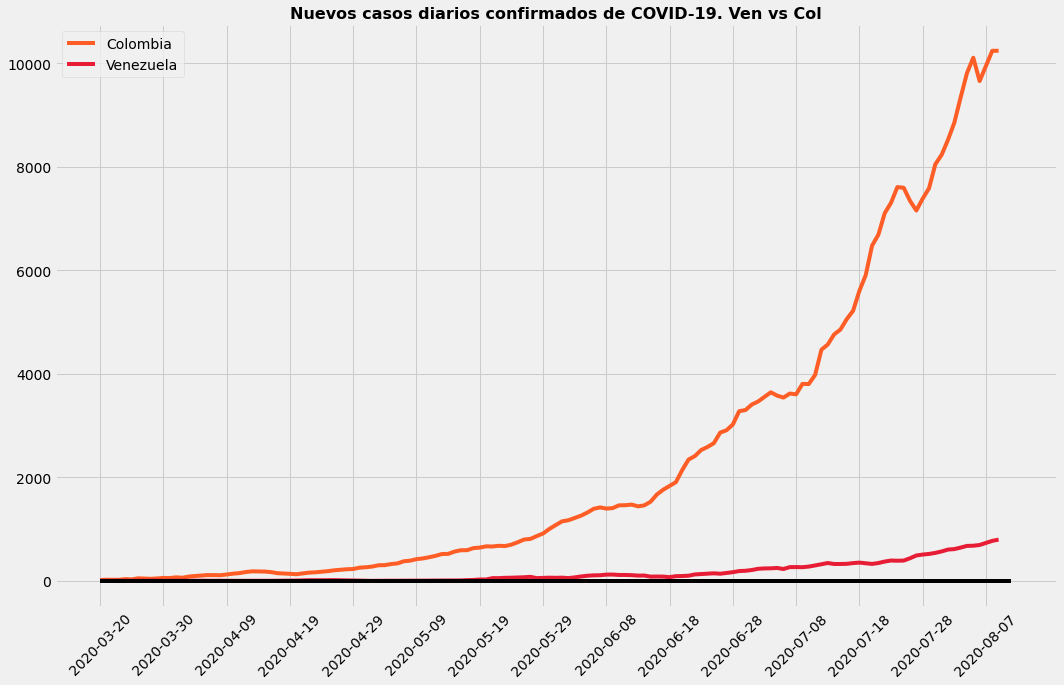

In [7]:
df_ven.index = df_ven.Date_reported
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
plt.title('Nuevos casos diarios confirmados de COVID-19. Ven vs Col', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_col, '#fe5d26', label = 'Colombia')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_ven, '#e71d36', label = 'Venezuela')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.show()

## La Verdad
En el grafico se aprecia que colombia y venezuela siguen una misma trayectoria en cuanto a aumento de casos diarios, de hecho Venezuela no reporta inforamcion sobre las pruebas que realiza y se tieen serias [dudas](https://efectococuyo.com/coronavirus/gobierno-limita-pruebas-de-covid-19-para-mantener-control-de-cifras-asegura-bloomberg/) sobre la capacidad de testeo en el país.

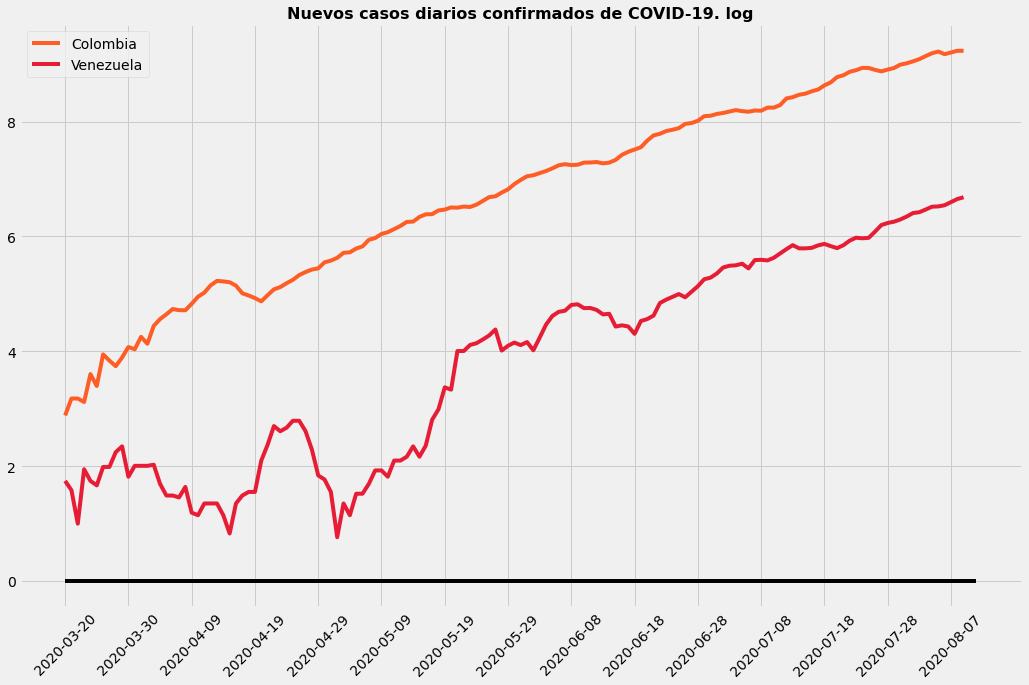

In [8]:
df_ven.index = df_ven.Date_reported
plt.figure(figsize=(16,10))
plt.style.use('fivethirtyeight')
plt.title('Nuevos casos diarios confirmados de COVID-19. log', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_col), '#fe5d26', label = 'Colombia')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_ven), '#e71d36', label = 'Venezuela')

x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.grid(True)
plt.show()

## Un Caso Exitoso
Uruguay es el caso exitoso latinoamercano junto con Chile manteniendo la pandemaia bajo control.

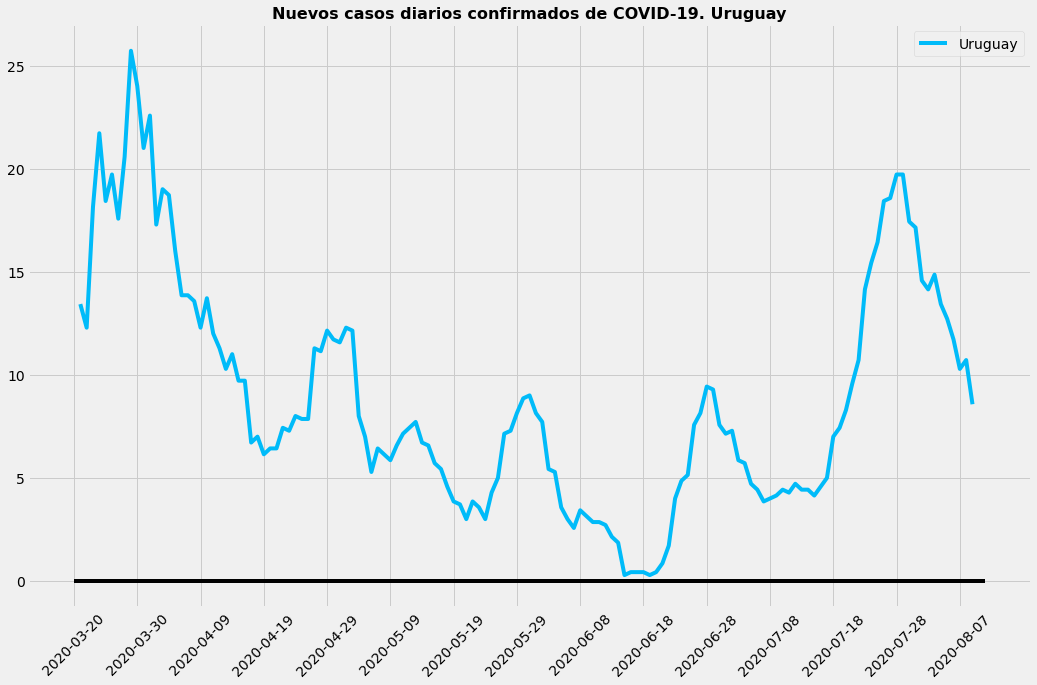

In [9]:
df_ven.index = df_ven.Date_reported
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
plt.title('Nuevos casos diarios confirmados de COVID-19. Uruguay', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_uru, '#00bbf9', label = 'Uruguay')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.grid(True)
plt.show()

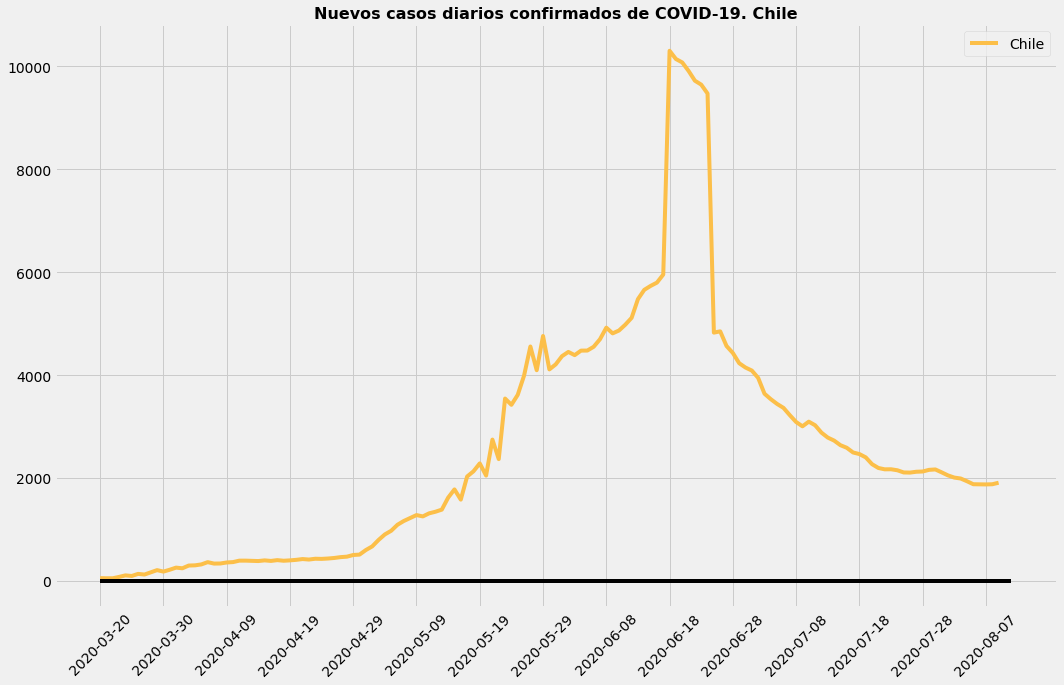

In [10]:
df_ven.index = df_ven.Date_reported
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
plt.title('Nuevos casos diarios confirmados de COVID-19. Chile', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_chi, '#FCBF49', label = 'Chile')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.grid(True)
plt.show()

## La Región
Brasil dada su población tiene el mayor número de casos sin embargo empieza a controlar la tasa de aumento de los contagios Chile ya logro doblar la curva así como Uruguay el resto de los países aun se encuentran en fases crecientes de las tasas de contagios.

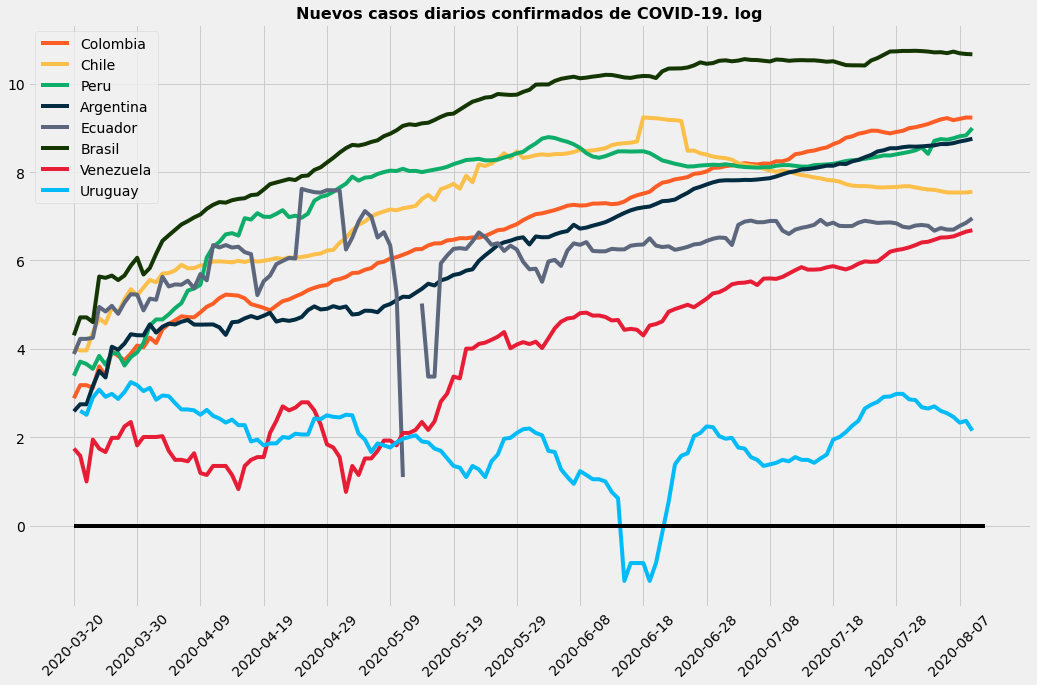

In [11]:
df_ven.index = df_ven.Date_reported
plt.figure(figsize=(16,10))
plt.style.use('fivethirtyeight')
plt.title('Nuevos casos diarios confirmados de COVID-19. log', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_col), '#fe5d26', label = 'Colombia')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_chi), '#FCBF49', label = 'Chile')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_per), '#0ead69', label = 'Peru')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_arg), '#002C42', label = 'Argentina')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_ecu), '#5c677d', label = 'Ecuador')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_bra), '#143601', label = 'Brasil')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_ven), '#e71d36', label = 'Venezuela')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_uru), '#00bbf9', label = 'Uruguay')

x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.grid(True)
plt.show()

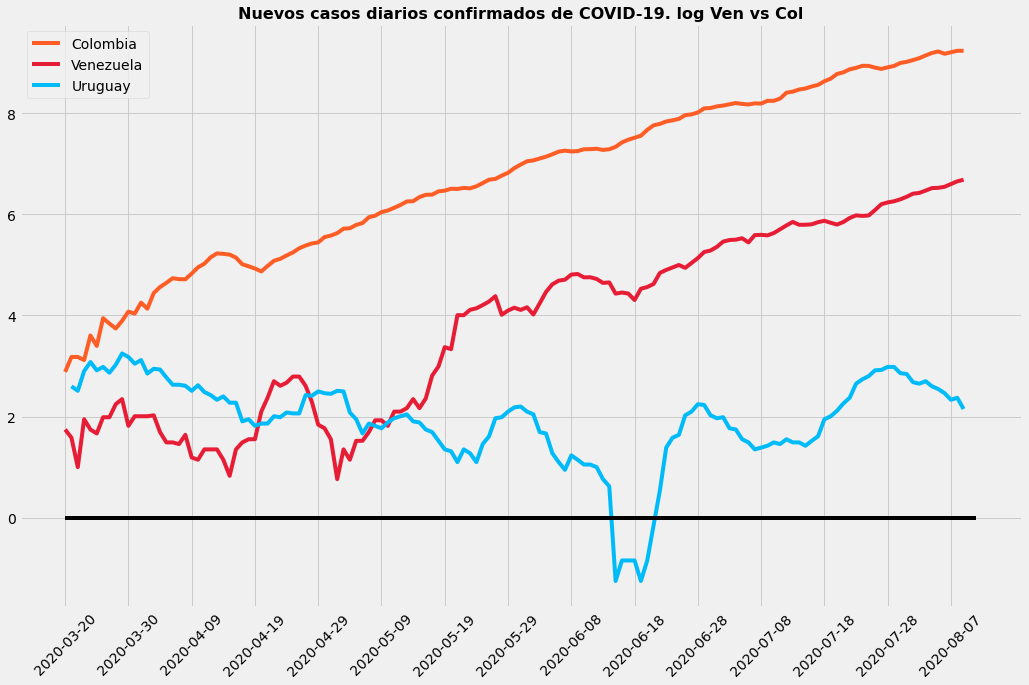

In [12]:
df_ven.index = df_ven.Date_reported
plt.figure(figsize=(16,10))
plt.style.use('fivethirtyeight')
plt.title('Nuevos casos diarios confirmados de COVID-19. log Ven vs Col', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_col), '#fe5d26', label = 'Colombia')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_ven), '#e71d36', label = 'Venezuela')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_uru), '#00bbf9', label = 'Uruguay')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.show()

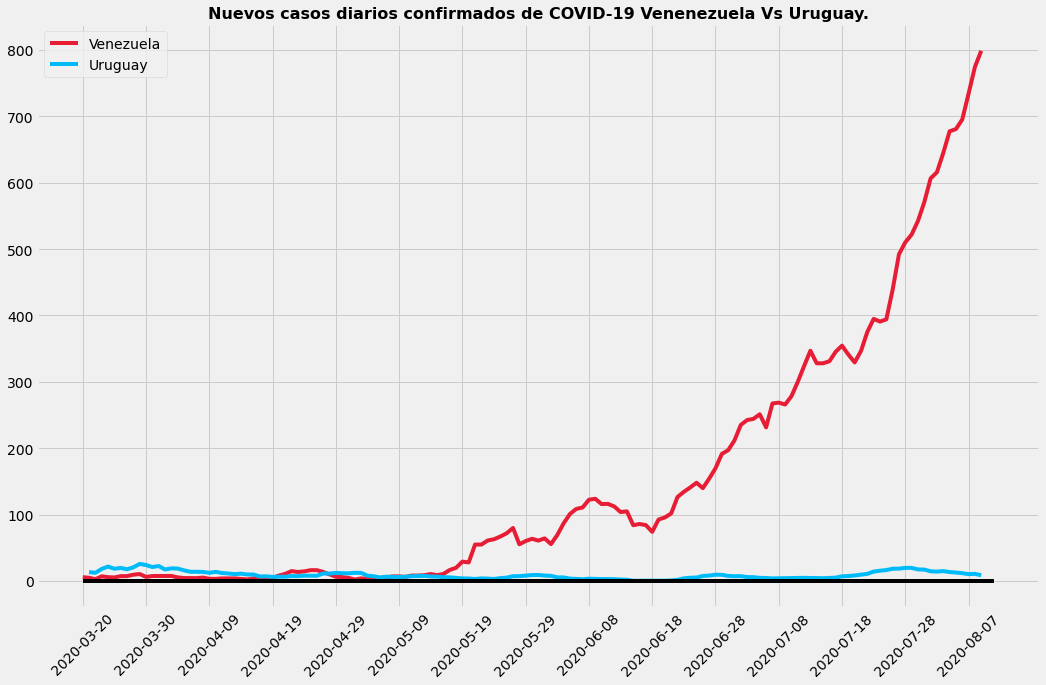

In [13]:

df_ven.index = df_ven.Date_reported
plt.figure(figsize=(16,10))
plt.style.use('fivethirtyeight')
plt.title('Nuevos casos diarios confirmados de COVID-19 Venenezuela Vs Uruguay.', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_ven, '#e71d36', label = 'Venezuela')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_uru, '#00bbf9', label = 'Uruguay')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.grid(True)
plt.show()

## Caso Suecia
El caso de Suecia es interesante porque es usado por los que están en contra de los confinamientos estrictos y por los que están a favor, los que están en contra argumentan que sin confinamientos estrictos Suecia aplanar la curva y ya está por dejar al covid en el pasado,los que están a favor argumentan el costo en vidas humanas que cobró el virus (aproximadamente al 8/8/2020 una 5766 vidas) mucho más que sus vecinos Noruega y Dinamarca que sí tomaron medidas estrictas de cuarentena de hecho a pesar de que suecia solo tiene el doble de población que noruega y dinamarca tiene en este momento 10 y 20 muertes más respectivamente.

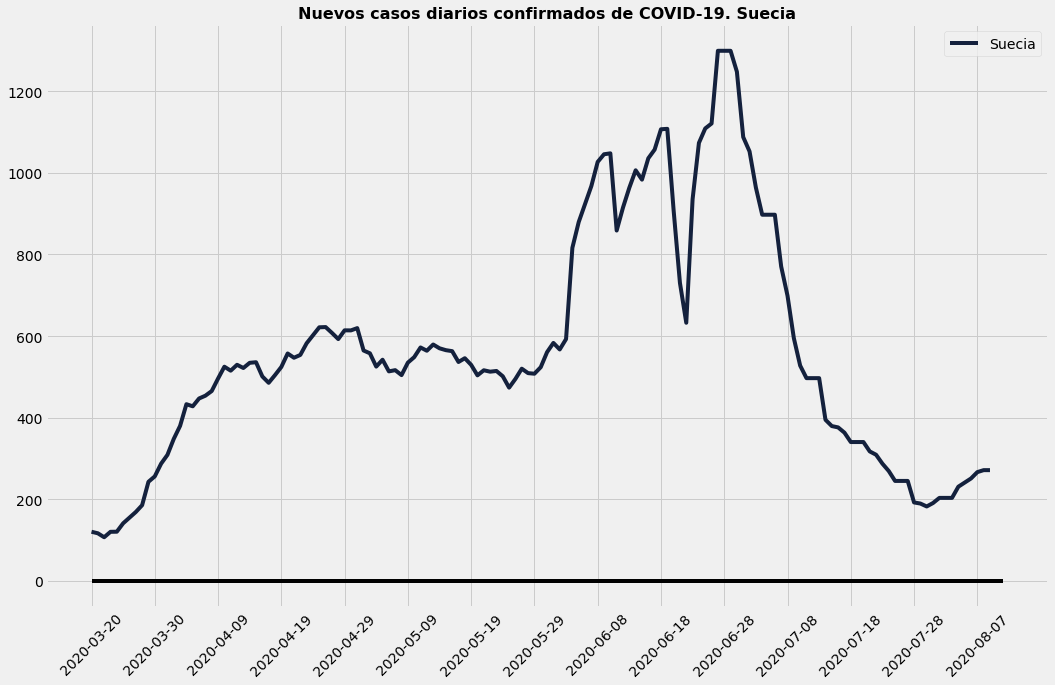

In [14]:
df_ven.index = df_ven.Date_reported
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
plt.title('Nuevos casos diarios confirmados de COVID-19. Suecia', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_sue, '#14213D', label = 'Suecia')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.show()

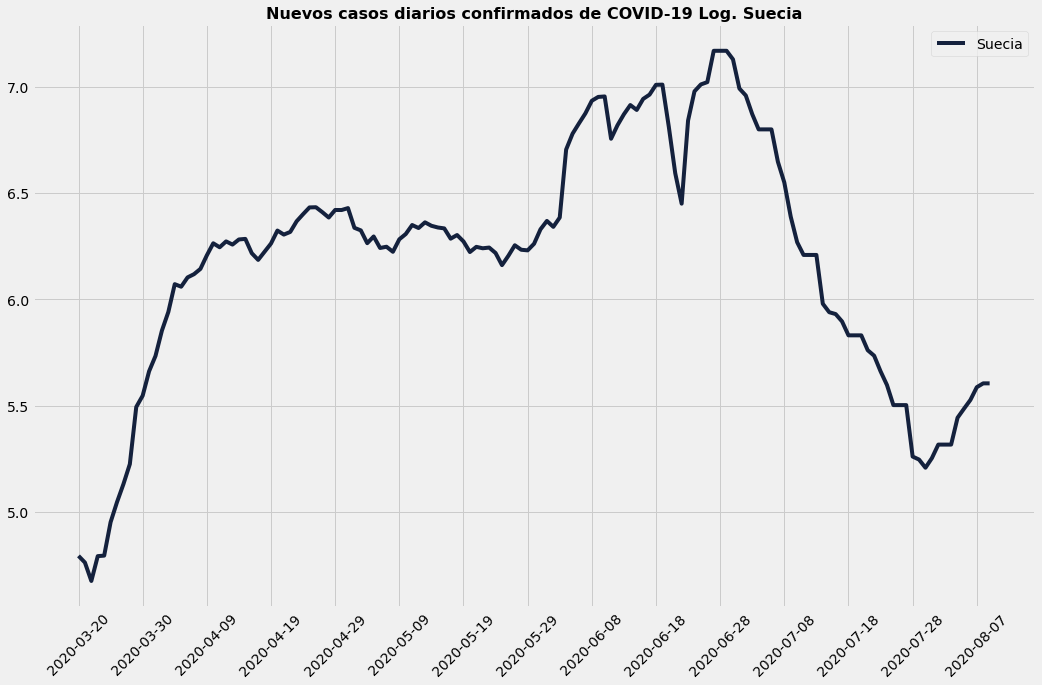

In [15]:
df_ven.index = df_ven.Date_reported
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,10))
plt.title('Nuevos casos diarios confirmados de COVID-19 Log. Suecia', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_sue), '#14213D', label = 'Suecia')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.show()

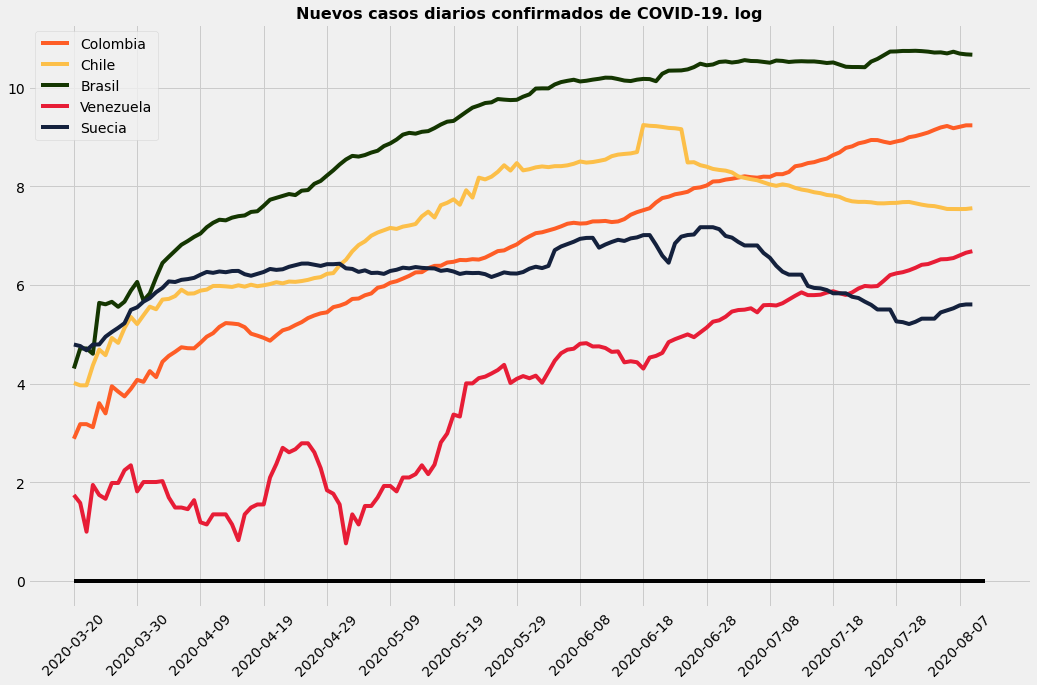

In [16]:
df_ven.index = df_ven.Date_reported
plt.figure(figsize=(16,10))
plt.style.use('fivethirtyeight')
plt.title('Nuevos casos diarios confirmados de COVID-19. log', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_col), '#fe5d26', label = 'Colombia')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_chi), '#FCBF49', label = 'Chile')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_bra), '#143601', label = 'Brasil')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_ven), '#e71d36', label = 'Venezuela')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_sue), '#14213D', label = 'Suecia')

x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
x_coordinates = [0, 144]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, "black")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Muertes Totales')

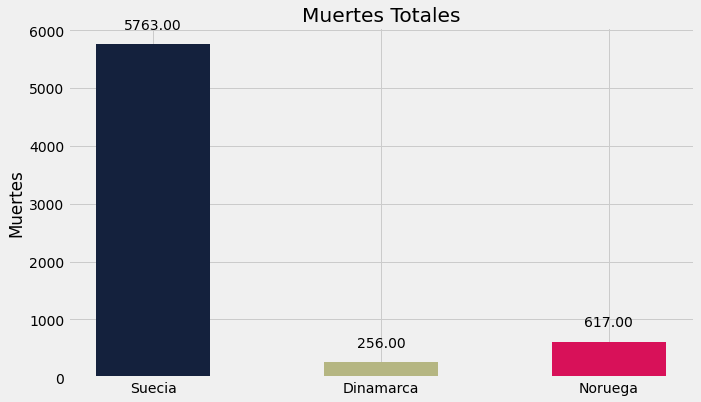

In [17]:
plt.style.use('fivethirtyeight')
x = [df_sue.New_deaths.sum(), df_nor.New_deaths.sum(), df_den.New_deaths.sum()]
y = ["Suecia","Dinamarca", "Noruega"]
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
color_list = ['#14213D', '#b5b682', '#d81159']
plt.bar(y, x, width=0.5, color=color_list)
for x,y in zip(y, x):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center')
plt.ylabel('Muertes')
plt.title('Muertes Totales')